In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
# Load data. Source: https://www.kaggle.com/GoogleNewsLab/health-searches-us-county
df = pd.read_csv('RegionalInterestByConditionOverTime.csv')

In [3]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Boxplot for 2017 data 

In [4]:
# feature engineering

df_17 = df[['dma', 'geoCode', '2017+cancer', '2017+cardiovascular', '2017+stroke', '2017+depression', '2017+rehab', '2017+vaccine', '2017+obesity', '2017+diabetes']]
df_17['max_value'] = df_17.drop(['geoCode'], axis=1).max(axis=1)
df_17['max_name'] = df_17.drop(['geoCode', 'dma'], axis=1).idxmax(axis=1)

diabetes = []
cancer = []
cardiovascular = []
stroke = []
depression = []
rehab = []
vaccine = []
diarrhea = []
obesity = []
for column in df.columns:
    if 'diabetes' in column:
        diabetes.append(sum(df[column]))
    elif 'cancer' in column:
        cancer.append(sum(df[column]))
    elif 'cardiovascular' in column:
        cardiovascular.append(sum(df[column]))
    elif 'stroke' in column:
        stroke.append(sum(df[column]))
    elif 'depression' in column:
        depression.append(sum(df[column]))
    elif 'rehab' in column:
        rehab.append(sum(df[column]))
    elif 'vaccine' in column:
        vaccine.append(sum(df[column]))
    elif 'diarrhea' in column:
        diarrhea.append(sum(df[column]))
    elif 'obesity' in column:
        obesity.append(sum(df[column]))

/Users/darrenthomas/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/darrenthomas/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[Text(0, 0, 'diabetes'),
 Text(0, 0, 'cancer'),
 Text(0, 0, 'cardiovascular'),
 Text(0, 0, 'stroke'),
 Text(0, 0, 'depression'),
 Text(0, 0, 'rehab'),
 Text(0, 0, 'vaccine'),
 Text(0, 0, 'obesity')]

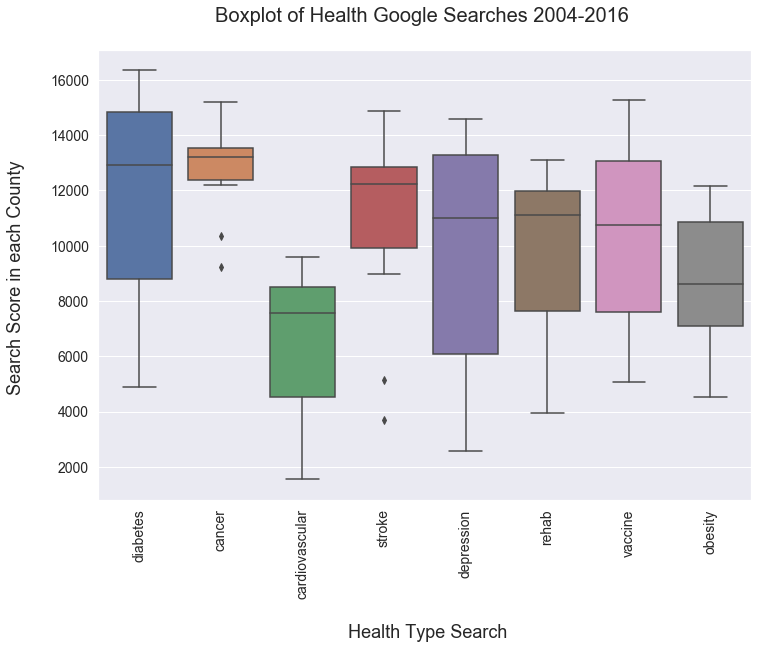

In [5]:
fig, ax = plt.subplots()
sns.boxplot(data=[diabetes, cancer, cardiovascular, stroke, depression, rehab, vaccine, obesity])
plt.xticks(rotation=90)
plt.xlabel('\n Health Type Search', fontsize=18)
plt.ylabel('Search Score in each County \n', fontsize=18)
plt.title('Boxplot of Health Google Searches 2004-2016 \n', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(labels=['diabetes', 'cancer', 'cardiovascular', 'stroke', 'depression', 'rehab', 'vaccine', 'obesity'])


# Heatmap of 2017 California City Searches

In [6]:
# feature engineering
heatmap = df_17[df_17['dma'].str.contains(" CA")]
heatmap.dma = heatmap['dma'].str[:-3]
heatmap = heatmap.drop(columns=['geoCode', 'max_value', 'max_name']).set_index('dma')
heatmap.columns = labels=['cancer', 'cardiovascular', 'stroke', 'depression', 'rehab', 'vaccine', 'obesity', 'diabetes']

/Users/darrenthomas/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text yticklabel objects>)

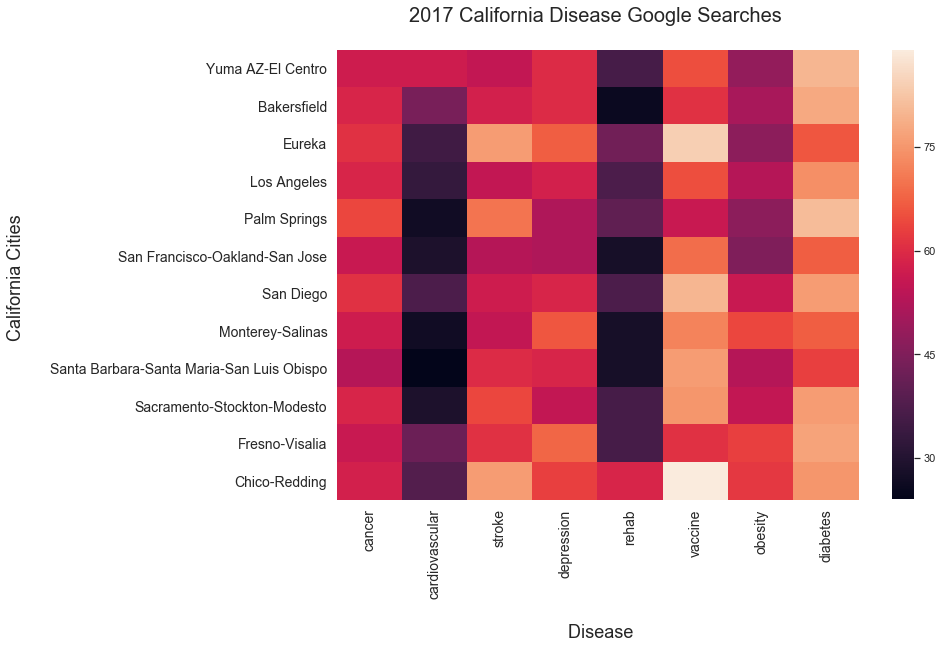

In [7]:
sns.heatmap(heatmap)
plt.xlabel('\n Disease', fontsize=18)
plt.ylabel('California Cities \n', fontsize=18)
plt.title('2017 California Disease Google Searches \n', fontsize=20)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Stacked Area Graph

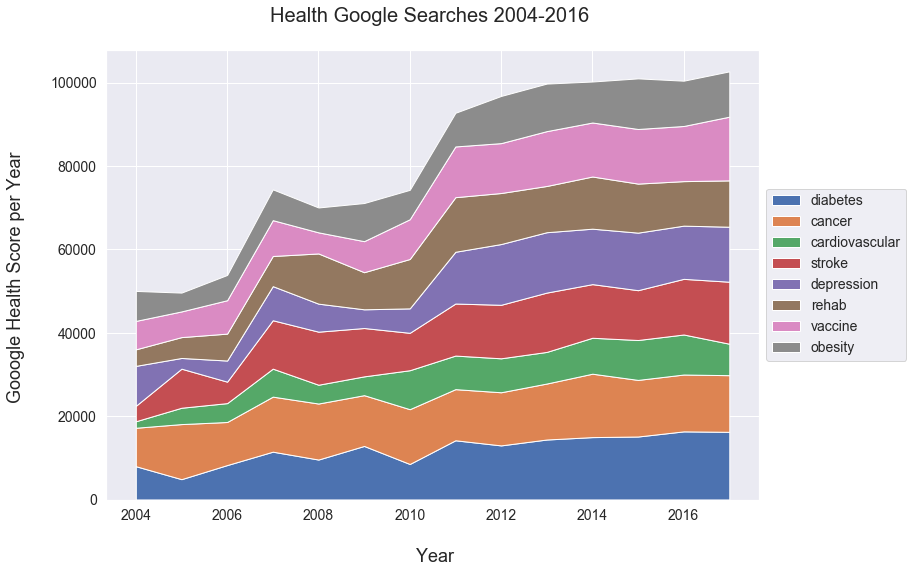

In [8]:
plt.stackplot([year for year in range(2004, 2018)], [diabetes, cancer, cardiovascular, stroke, depression, rehab, vaccine, obesity], labels = ['diabetes', 'cancer', 'cardiovascular', 'stroke', 'depression', 'rehab', 'vaccine', 'obesity'])
plt.legend(loc='upper left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
pal = sns.color_palette("Set1")
plt.xlabel('\n Year', fontsize=18)
plt.ylabel('Gooogle Health Score per Year \n', fontsize=18)
plt.title('Health Google Searches 2004-2016 \n', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks()
plt.show()

# Scatterplots

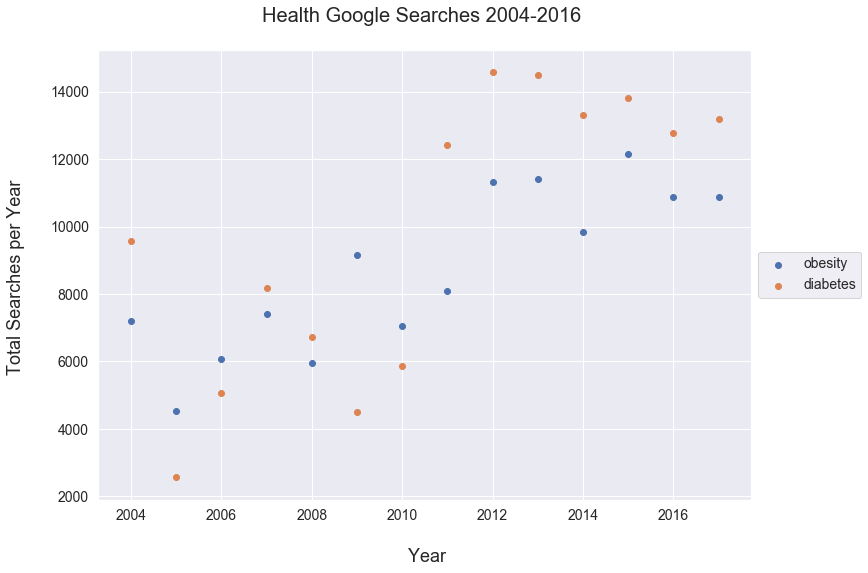

In [9]:
plt.scatter([year for year in range(2004, 2018)], obesity, label = 'obesity')
plt.scatter([year for year in range(2004, 2018)], depression, label = 'diabetes')
plt.legend(loc='upper left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
pal = sns.color_palette("Set1")
plt.xlabel('\n Year', fontsize=18)
plt.ylabel('Total Searches per Year \n', fontsize=18)
plt.title('Health Google Searches 2004-2016 \n', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks()
plt.show()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

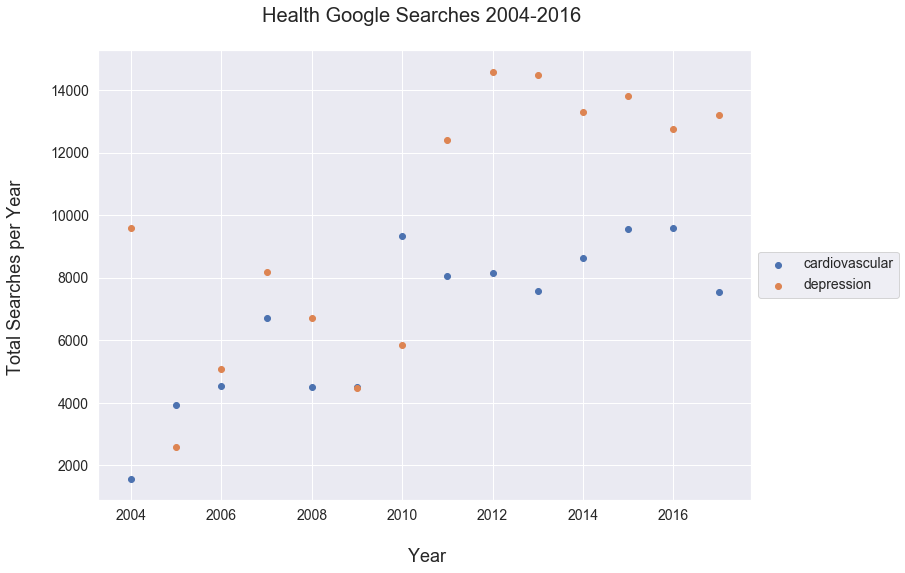

In [10]:
plt.scatter([year for year in range(2004, 2018)], cardiovascular, label = 'cardiovascular')
plt.scatter([year for year in range(2004, 2018)], depression, label = 'depression')
plt.legend(loc='upper left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
pal = sns.color_palette("Set1")
plt.xlabel('\n Year', fontsize=18)
plt.ylabel('Total Searches per Year \n', fontsize=18)
plt.title('Health Google Searches 2004-2016 \n', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Barplot

In [11]:
# feature engineering
diseases = [diabetes, cancer, cardiovascular, stroke, depression, rehab, vaccine, diarrhea, obesity]

max_indexes = []
for i in range(len(diabetes)):
    max_value = max([value[i] for value in diseases])
    max_index = [value[i] for value in diseases].index(max_value)
    max_indexes.append(max_index)
max_indexes

labels=['diabetes', 'cancer', 'cardiovascular', 'stroke', 'depression', 'rehab', 'vaccine', 'obesity']

names = [labels[index] for index in max_indexes]

In [12]:
# create dataframe
data = {'year':[j for j in range(2004, 2018)], 'total':[sum(i) for i in zip(*diseases)], 'highest_search':names}
data = pd.DataFrame(data)

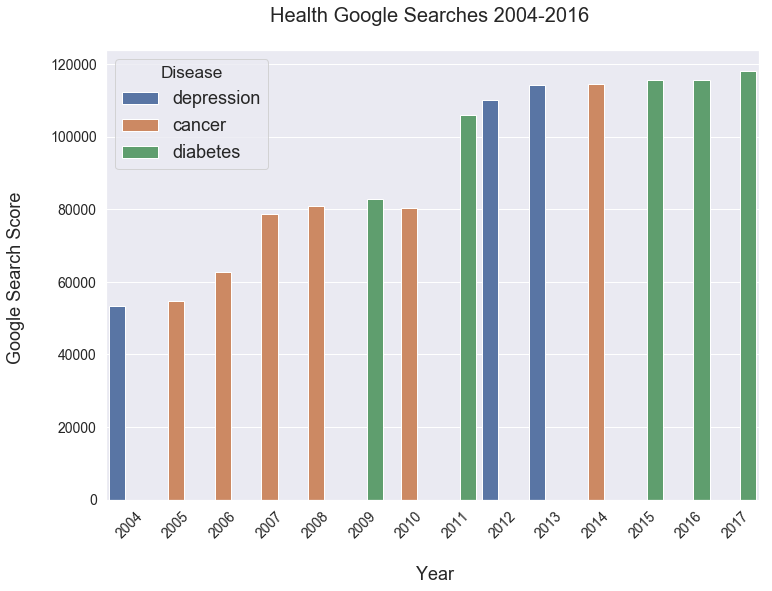

In [13]:
fig, ax = plt.subplots()

sns.barplot(x='year', y='total', hue='highest_search', data=data)
plt.xlabel('\n Year', fontsize=18)
plt.ylabel('Google Search Score \n', fontsize=18)
plt.title('Health Google Searches 2004-2016 \n', fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(fontsize=18).set_title("Disease", prop = {'size':'x-large'})

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()

# Histogram

In [14]:
totals = df.drop(columns='geoCode')
totals['total'] = totals.mean(axis=1)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

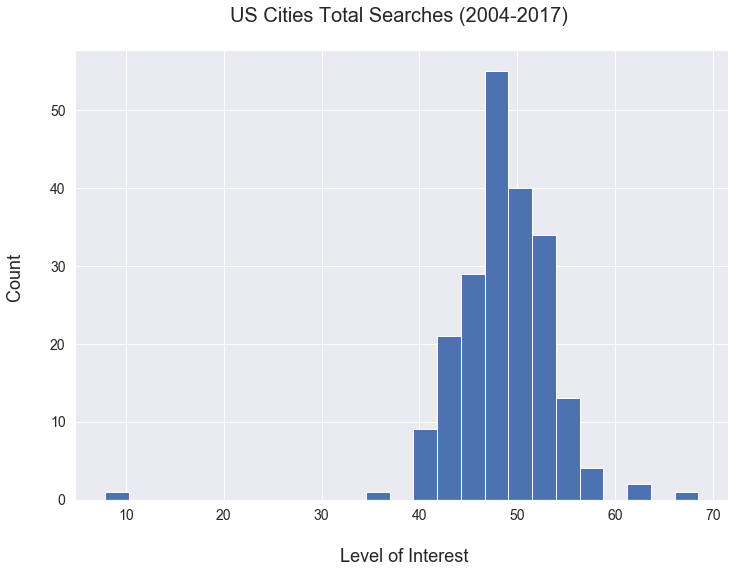

In [15]:
plt.hist(totals.total, bins=25)
plt.xlabel('\n Level of Interest', fontsize=18)
plt.ylabel('Count \n', fontsize=18)
plt.title('US Cities Total Searches (2004-2017) \n', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### .csv creations for Tableau graphs

In [16]:
search_types_17 = df_17[['dma', 'geoCode', 'max_value', 'max_name']]
search_types_17.to_csv('search_types_17.csv')

In [17]:
df_17.dma = df_17.dma.str[:-2]
df_17.dma = df_17.dma.str.split('-').str[0]
df_17.dma = df_17.dma.str.split('(').str[0]
df_17.to_csv('search_types_17_2.csv')

In [18]:
summed = [sum(disease) for disease in diseases]
labels=['diabetes', 'cancer', 'cardiovascular', 'stroke', 'depression', 'rehab', 'vaccine', 'diarrhea', 'obesity']
summed_df = {'summed':summed, 'labels':labels} 
summed_df = pd.DataFrame(summed_df)
summed_df.to_csv('treemap.csv')